In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
import mglearn 
X, y = mglearn.datasets.make_wave(n_samples=120) # make_wave = 회귀와 관련 # x,y = 분류나 회귀를 위한 데이터 # 샘플 수에 의해 데이터 스펙트럼 넓어짐 

In [63]:
# y # 회귀를 위한 데이터(소수점)
X.shape # 데이터 건수는 100, 관측치(attribute,속성)는 1개

(120, 1)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  

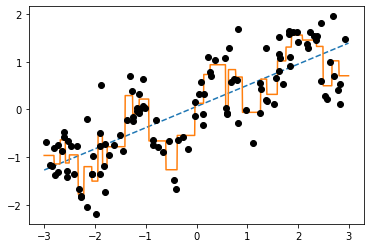

In [65]:
dtr = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y) # 한 leaf 안에 최소 3개의 데이터가 있어야 한다(과대적합 문제 때문에)
lr = LinearRegression().fit(X, y)

line = np.linspace(-3, 3, 1000, endpoint=False) # -3 ~ 3사이 1000개 데이터 꺼내기 # reshape -> 2차원으로 만들겠다
line = line.reshape(-1, 1) # 원래 1차원 데이터 배열인데 -1을 주어(몇 행인지 원래 넣는건데 -1을 넣으면 몇 행인지 모르겠다는 뜻!) 2차원 배열로 만듬

plt.plot(line, lr.predict(line), '--') # LinearRegression으로 예측한 값 그래프 
plt.plot(line, dtr.predict(line)) # DecisionTreeRegression으로 예측한 값 그래프 
plt.plot(X[:, 0], y, 'o', c='black') # 실제 데이터로 그래프
plt.show() # 선은 예측값, 점은 실제값

In [66]:
lr.score(X, y) # 62%의 정확도
dtr.score(X, y) # DecisionTreeRegressor -> 89%의 정확도

0.8562462696125981

In [67]:
from sklearn.preprocessing import KBinsDiscretizer # 급간을 나눠서 관리해주는 도구

In [68]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform') # 전체 데이터를 10개의 구간으로 나누고 단일 값으로 반환하도록 만듬
kb.fit(X)
X_binned = kb.transform(X)

In [69]:
X[:10], X_binned[:10].toarray() # X_binned[:10] --> sparse matrix ->OneHotEncoding처리가 된 것 # 왼쪽의 X값을 다른 속성으로 바꾼 것

(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816],
        [-2.06403288],
        [-2.65149833],
        [ 2.19705687],
        [ 0.60669007],
        [ 1.24843547]]),
 array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]]))

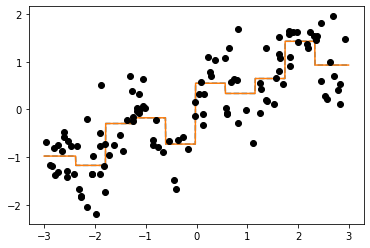

In [70]:
dtr = DecisionTreeRegressor(min_samples_leaf=3).fit(X_binned.toarray(), y) 
lr = LinearRegression().fit(X_binned.toarray(), y)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1) 
line = line.reshape(-1, 1) 
line_binned = kb.transform(line)

plt.plot(line, lr.predict(line_binned.toarray()), '--') # 구간 별로 데이터 특성을 다르게 해서 다른 예측을 하기 위해서 # 첫번째 구간에는 이 모양, 두번째 구간에는 ~ 모양
plt.plot(line, dtr.predict(line_binned.toarray())) # 위 line과 겹쳐있어서 선이 하나로 보임
plt.plot(X[:, 0], y, 'o', c='black') 
plt.show()


In [71]:
# dtr.predict(line.toarray())
# X_binned[:20].toarray() # 구간별로 다른 값을 가지고 있다. # 같은 행은 같은 값, 같은 열은 같은 값
# lr.predict(line_binned.toarray()) # 같은 범위는 같은 값을 추력

In [72]:
# 단일속성 -> biined-multivalue
lr.score(X_binned.toarray(), y), dtr.score(X_binned.toarray(), y) # 구간별로 나눴을 때 78%의 정확도 -> 속성을 바꾸는 것만으로도 모델의 정확도 높일 수 있다 # dtr은 오히려 성능이 낮아짐(악화)

(0.7237309728172019, 0.7237309728172019)

In [ ]:
### 속성이 온전히 데이터를 나타내지 못한다는 생각 하에 속성을 변경하는 방향으로! -> 속성이 데이터를 잘 반영하도록(기존에는 잘 반영하지 못한다) -> 속성에 변화 주기

In [73]:
X_combined = np.hstack([X, X_binned.toarray()]) # hstack = 열 방향으로 갖다 붙임

In [74]:
print(X_combined.shape)
X_combined[:5] #앞에는 원래 값, 뒤에는 onehotencoding # 원래 속성도 유지 # 절편의 변동만 생김, 기울기(맨 앞)에는 영향 x  # 각 값들에 w1, w2, w3,.. 붙이면 됨

(120, 11)


array([[-0.75275929,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.70428584,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 1.39196365,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.59195091,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-2.06388816,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

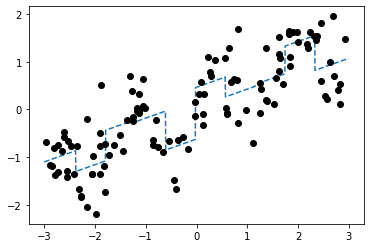

In [75]:
# 구간 별로 나누기
dtr = DecisionTreeRegressor(min_samples_leaf=3).fit(X_combined, y) 
lr = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned.toarray()])
plt.figure(figsize=(10,10))
plt.plot(line, lr.predict(line_combined), '--') # 구간 별로 데이터 특성을 다르게 해서 다른 예측을 하기 위해서 # 첫번째 구간에는 이 모양, 두번째 구간에는 ~ 모양
# plt.plot(line, dtr.predict(line_combined) # 위 line과 겹쳐있어서 선이 하나로 보임
plt.plot(X[:, 0], y, 'o', c='black') 

plt.show()

In [78]:
print(lr.coef_) # n_samples=120에 의해 coefficient(기울기)값 0.37로 분명하게 나타남
lr.score(X_combined, y), dtr.score(X_combined, y) # lr은 차이 없으나 dtr은 개선되는 것을 확인할 수 있다. # 모델 / 원본데이터에 따라 영향 적게 받거나, 많이 받거나 할 수 있다.

[ 0.37891039 -0.02879907 -0.46519195  0.17621386  0.13142368 -0.68549904
  0.39882373 -0.01863165  0.02106605  0.6006746  -0.13008021]


(0.7277571512572492, 0.8562462696125981)

In [77]:
lr.predict(line_combined)[:10]

array([-1.09895799, -1.09668452, -1.09441106, -1.0921376 , -1.08986414,
       -1.08759067, -1.08531721, -1.08304375, -1.08077029, -1.07849683])

In [82]:
X_product = np.hstack([X_binned.toarray(), X*X_binned.toarray()]) # binned에 원속성 결합한 값 (X1xX2같은 상호작용 말하는 것!)
X_product.shape # 120 x 20 -> 20개의 항목으로 늘어남

(120, 20)

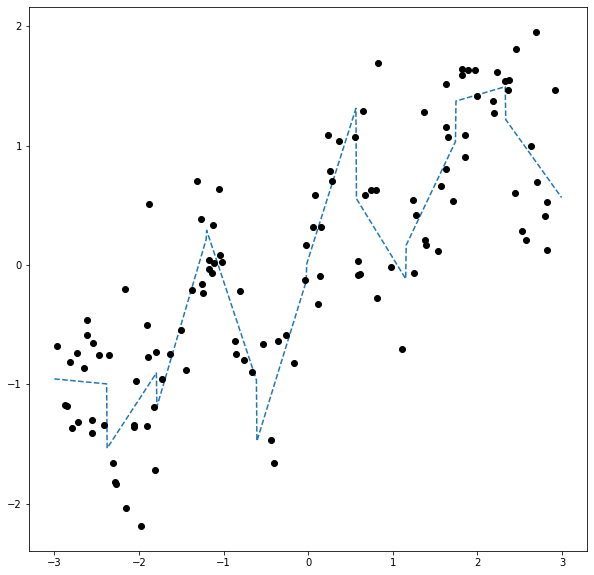

In [83]:
# 상호작용으로 기울기 바꾸기 -> 다중공선성의 위험은 있음(과대적합 문제) -> 그러나 이전 모형보다 더 매끄럽게 보이긴 함 # 훈련데이터의 성능이 높아질 수는 있지만 다중공선성 위험 존재
dtr = DecisionTreeRegressor(min_samples_leaf=3).fit(X_product, y) 
lr = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned.toarray(), line * line_binned.toarray()])

plt.figure(figsize=(10,10))

plt.plot(line, lr.predict(line_product), '--') 
# plt.plot(line, dtr.predict(line_product) # 위 line과 겹쳐있어서 선이 하나로 보임
plt.plot(X[:, 0], y, 'o', c='black') 

plt.show() # 구간 별 서로 다른 기울기

In [84]:
lr.score(X_product, y), dtr.score(X_product, y) #regression 개선

(0.787287089329761, 0.8445439930757523)

In [87]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
poly = PolynomialFeatures(degree=10, include_bias=False) # 차수 넣어주기 # 절편 넣을건지!
poly.fit(X)
X_poly = poly.transform(X)

In [92]:
print(X.shape, X_poly.shape) # 1차원에서 10차원으로 늘어남
poly.get_feature_names() # 원래, 제곱항, 세제곱항 , .. 10제곱항까지 -> 흐름이 곡선으로 감

(120, 1) (120, 10)


['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

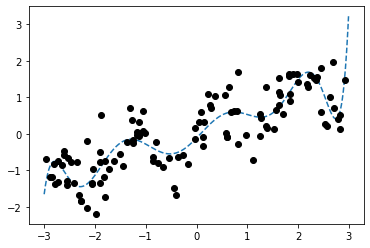

In [93]:
dtr = DecisionTreeRegressor(min_samples_leaf=3).fit(X_poly, y) 
lr = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)

plt.plot(line, lr.predict(line_poly), '--') 
# plt.plot(line, dtr.predict(line_poly) # 위 line과 겹쳐있어서 선이 하나로 보임
plt.plot(X[:, 0], y, 'o', c='black') 

plt.show() 

In [94]:
lr.score(X_poly, y), dtr.score(X_poly, y)

(0.7346894080529943, 0.8562462696125981)

In [99]:
np.random.seed(0)
X_org = np.random.normal(size=(1000,3)) # 행 1000, 열 3 # normal -> 정규분포로부터 데이터를 뽑음
w = np.random.normal(size=3) # 가중치 3

X = np.random.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [100]:
np.mean(X_org), np.std(X_org) # 평균 0과 표편 1에 가깝다.

(-0.027622776946568013, 0.9703051206423566)

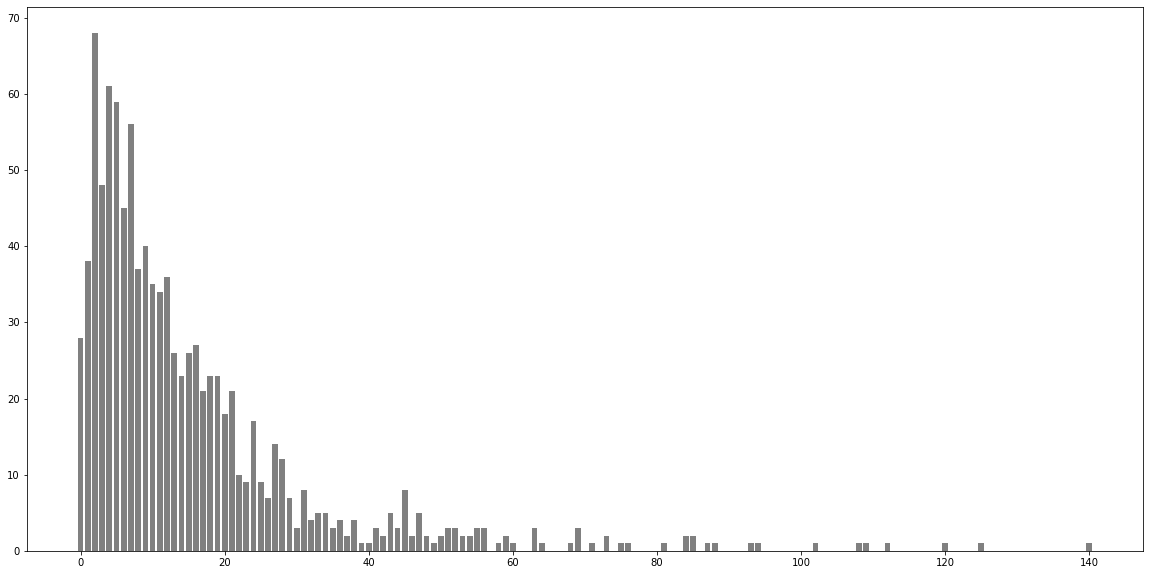

In [105]:
bins = np.bincount(X[:, 0]) # unique, valuecount 역할
plt.figure(figsize=(20, 10))
plt.bar(range(len(bins)), bins, color='grey')
plt.show() # 오른쪽으로 긴 꼬리 형태 -> 설명력이 좋지 않다 -> 정규분포로 바꾸는 것은 가치가 있다.

In [107]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
ridge = Ridge().fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.6564225882120297, 0.6116141061920278)

In [110]:
# 로그를 취하거나 루트를 씌우면 정규분포에 가까워진다
#로그(루트보다 더 오른쪽으로 옴)
X_train_log = np.log(X_train + 1) # +1을 해야 값이 0이 되지 않으므로!
X_test_log = np.log(X_test + 1)

#루트 씌우기
X_train_sqrt = np.sqrt(X_train)
X_test_sqrt = np.sqrt(X_test)

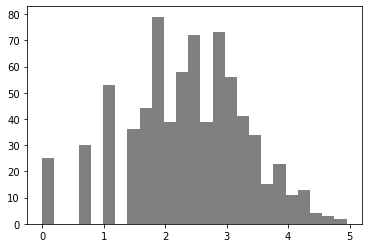

In [114]:
plt.hist(X_train_log[:, 0],bins=25, color='grey')
plt.show() # 오른쪽으로 온 것을 알 수 있다

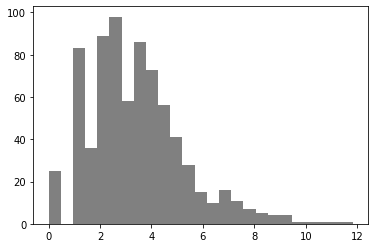

In [115]:
plt.hist(X_train_sqrt[:, 0],bins=25, color='grey')
plt.show() # 기존보다 살짝 오른쪽으로 온 것을 알 수 있다

In [117]:
print( Ridge().fit(X_train_log, y_train).score(X_test_log, y_test))
print( Ridge().fit(X_train_sqrt, y_train).score(X_test_sqrt, y_test)) #기존 0.65,0.61에 비해 0.88,0.83으로 높게 나왔다. # 분포만 조정해줘도 모델 성능 높게 나온다

0.8806884060113291
0.8312531066975319


In [119]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_regression, f_classif, chi2 #percentile -> 비율로나타내겠다 #연속형 변수의 독립성, 상관성 알 수 있다. p-value로 알 수 있음
# f_regression과 f_classif는 한세트 # chi-squared : 범주형변수만의 독립성

In [122]:
cancer = load_breast_cancer()

np.random.seed(42)
noise = np.random.normal(size=(len(cancer.data), 50)) # 50개의 새로운 컬럼 추가, make new 50 columns

X_w_noise = np.hstack([cancer['data'], noise]) # 50개의 새로운 노이즈 컬럼 넣기

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer['target'], random_state=42)

In [123]:
# X_train.shape # 30개에서 80개로 증가

(426, 80)

In [129]:
select = SelectPercentile(score_func=f_classif, percentile=40) # 분류이므로 f_classif 사용 -> pvalue로 40% 뽑아내겠다 
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

In [130]:
X_train_selected.shape # 40% 뽑아낸 것 # 32개로 줄어듬 # pvalue(귀무가설 맞을 확률) 줄세운 후 자른것

(426, 32)

In [132]:
select.get_support() # 앞에있는 것이 true가 많음. 중요한 속성들 뽑아내고 있음 # True가 32개 속성에 해당

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False])

In [133]:
from sklearn.linear_model import LogisticRegression

In [135]:
lr = LogisticRegression(max_iter=5000)

lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

lr.fit(X_train_selected, y_train)
X_test_selected = select.transform(X_test)
print(lr.score(X_train_selected, y_train), lr.score(X_test_selected, y_test))

0.9976525821596244 0.965034965034965
0.9624413145539906 0.965034965034965


In [136]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [140]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
select = SelectFromModel(rfc, threshold="median")

In [141]:
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

In [143]:
X_train.shape, X_train_selected.shape # 가운데를 선택했으므로 순서대로 세운 후 40개 선택한 것

((426, 80), (426, 40))

In [144]:
select.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False])

In [145]:
lr = LogisticRegression(max_iter=5000)

lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

lr.fit(X_train_selected, y_train)
X_test_selected = select.transform(X_test)
print(lr.score(X_train_selected, y_train), lr.score(X_test_selected, y_test))

0.9976525821596244 0.965034965034965
0.9671361502347418 0.965034965034965


In [146]:
from sklearn.feature_selection import RFE

In [147]:
select = RFE(rfc, n_features_to_select=40)

select.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=40)

In [148]:
select.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False])

In [149]:
lr = LogisticRegression(max_iter=5000)

lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

X_test_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)
lr.fit(X_train_selected, y_train)
print(lr.score(X_train_selected, y_train), lr.score(X_test_selected, y_test))

0.9976525821596244 0.965034965034965
0.9671361502347418 0.965034965034965
